
# **# EE 769 : Programming Assigmnet -2**

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Classification and Feature Engineering 

Name : Pooja Saini

Roll No. : 200040100


**Objective 1:** Learn various steps and due diligence needed to train successful classification models.

**Background:** Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not.Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particularbehavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of thereadings were discarded if they seemed unreliable (out of range).

1. Let your code read the data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv[0]

In [ ]:
import pandas as pd

# Read the data from the URL
url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv"
df = pd.read_csv(url)

2. Perform exploratory data analysis to find out:
   
   a. Which variables are usable, and which are not?
   
   b. Are there significant correlations among variables?

   c. Are the classes balanced?


   refresence: https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/

In [ ]:
# View the first few rows of the dataset
print(df.head())

# View the last few rows of the dataset
print(df.tail())

# View No. of rows and columns in dataset 
df.shape

# View the dataset data types
df.info()

# Check for missing values
print(df.isnull().sum())

# Examine the distributions of each variable
df.describe()

#check number of duplicate row in dataset
df.duplicated().sum()


   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...  BCL2_N     pS6_N   pCFOS_N     SYP_N  \
0   2.373744  0.232224  1.750936  ...     NaN  0.106305  0.108336  0.427099   
1   2.292150  0.226972  1.596377  ...     NaN  0.106592  0.104315  0.441581   
2   2.283337  0.230247  1.561316  ...     NaN  0.108303  0.106219  0.435777   
3   2.152301  0.207004  1.595086  ...     NaN  0.103184  0.111262  0.391691   
4   2.134014  0.192158  1.504230  ...     NaN  0.104784  0.110694  0.434154   

   H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment_Behavior  

0

Highly correlated variables:
('ITSN1_N', 'DYRK1A_N'): 0.9613212072854784
('pERK_N', 'DYRK1A_N'): 0.9472433791411023
('pERK_N', 'ITSN1_N'): 0.9074804338072034
('pNR1_N', 'NR1_N'): 0.9468858168031966
('pNR2B_N', 'pNR1_N'): 0.9001750435253704
('BRAF_N', 'DYRK1A_N'): 0.9655764713541687
('BRAF_N', 'ITSN1_N'): 0.9286107182545223
('BRAF_N', 'pERK_N'): 0.9317428632031786
('Bcatenin_N', 'NR1_N'): 0.928919593140024
('pS6_N', 'ARC_N'): 1.0


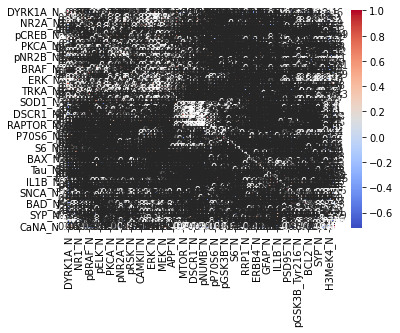

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap using sns.heatmap(), which help in visualize correlations between variables. 
# Darker colors indicate stronger positive correlations, 
# lighter colors indicate weaker correlations or negative correlations.
# Plot the correlation matrix as a heatmap

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Identify highly correlated variables
# Store and print the pairs of highly correlated variables and their correlation coefficients

corr_threshold = 0.9
corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            corr_pairs[(colname1, colname2)] = corr_matrix.iloc[i, j]

if corr_pairs:
    print("Highly correlated variables:")
    for pair, corr in corr_pairs.items():
        print(f"{pair}: {corr}")
else:
    print("No highly correlated variables found.")


3. Develop a strategy to deal with missing variables. You can choose to impute the variable. The recommendedway is to use multivariate feature imputation 

  Refrence:  https://scikit-learn.org/stable/modules/impute.html)

In [ ]:
# Use Multivariate feature imputation Method

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Identify missing values
missing_cols = df.columns[df.isna().any()].tolist()

# Impute missing values using multivariate feature imputation
# predict missing values based on the values of other features in the dataset
imputer = IterativeImputer(random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float'])))

# check any missing values remain or not
print(df_imputed.isnull().sum())

0     0
1     0
2     0
3     0
4     0
     ..
72    0
73    0
74    0
75    0
76    0
Length: 77, dtype: int64


In [ ]:
df_imputed

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197436,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


In [ ]:
# delete column because missing values is more than 150
# delete highly correlated columns 
df=df.dropna(axis=1)
print(df.isnull().sum())

DYRK1A_N              0
ITSN1_N               0
BDNF_N                0
NR1_N                 0
NR2A_N                0
                     ..
pS6_N                 0
SYP_N                 0
CaNA_N                0
Genotype              0
Treatment_Behavior    0
Length: 70, dtype: int64


5.Using five-fold cross-validation (you can use GridSearchCV from scikit-learn) to find the reasonable (I cannotsay “best” because you have two separate classifications to perform) hyper-parameter settings for thefollowing model types:

a. Linear SVM with regularization as hyperparameter

https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# split the data into features and labels
X = df.iloc[:, :-2]        # features
y_click = df.iloc[:, -2]  # first classification labels
y_move = df.iloc[:, -1]   # second classification labels

# scale the features

# StandardScaler transformer scales the features of a dataset to have zero mean and unit variance
scaler = StandardScaler()
#applies the transformation to the data by subtracting the mean and dividing by the standard deviation
# X_scaled matrix has same number of rows and columns as X, but the values have been transformed so that each feature has zero mean and unit variance
X_scaled = scaler.fit_transform(X)

# set up a parameter grid for the linear SVM with a range of values for the C hyperparameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# perform grid search for the click classification task
click_svc = LinearSVC(loss='hinge', max_iter=100000)
click_grid_search = GridSearchCV(click_svc, param_grid, cv=5)
click_grid_search.fit(X_scaled, y_click)
print("Best hyperparameters for click classification:", click_grid_search.best_params_)

# perform grid search for the move classification task
move_svc = LinearSVC(loss='hinge', max_iter=100000)
move_grid_search = GridSearchCV(move_svc, param_grid, cv=5)
move_grid_search.fit(X_scaled, y_move)
print("Best hyperparameters for move classification:", move_grid_search.best_params_)


Best hyperparameters for click classification: {'C': 0.01}
Best hyperparameters for move classification: {'C': 0.1}


b. RBF kernel SVM with kernel width and regularization as hyperparameters

https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# split into features and target same as part a
X = df.iloc[:, :-2]
y1 = df.iloc[:, -2]# first classification target
y2 = df.iloc[:, -1] # second classification target


# set up parameter grid for SVM
param_grid = {
    'C': [0.01,0.1, 1, 10,100],
    'gamma': [0.01, 0.1, 1, 10,100]
}

# perform five-fold cross-validation using GridSearchCV
# two separate SVM models using GridSearchCV, one for each classification task, and fit them to the data using five-fold cross-validation
svm1 = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
svm2 = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

svm1.fit(X, y1)
svm2.fit(X, y2)

# print best hyperparameters for each model
print("Best hyperparameters for y1: ", svm1.best_params_)
print("Best hyperparameters for y2: ", svm2.best_params_)


Best hyperparameters for y1:  {'C': 100, 'gamma': 0.01}
Best hyperparameters for y2:  {'C': 100, 'gamma': 0.01}


c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number ofneurons, weight decay)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


# separate the features and target sample as above two parts of question no. 5
X = df.iloc[:, :-2]
y1 = df.iloc[:, -2] # first classification target
y2 = df.iloc[:, -1] # second classification target

# standardize the features same as a.) part of question 5
scaler = StandardScaler()
X = scaler.fit_transform(X)

# define the classifier
# MLPClassifier trains iteratively at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.
# Activation function for the hidden layer and ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# The solver for weight optimization and ‘adam’ refers to a stochastic gradient-based optimizer
# random number generation for weights and bias initialization
clf = MLPClassifier(activation='relu', solver='adam', random_state=42)

# define the hyperparameters to be tuned
# number of neurons in the ith hidden layer
# alpha : Strength of the L2 regularization term
param_grid = {
              'hidden_layer_sizes': [(10,), (50,), (100,)],
              'alpha': [0.0001, 0.001, 0.01]
              }

# perform 5-fold cross-validation 
grid1 = GridSearchCV(clf, param_grid, cv=5)
grid2 = GridSearchCV(clf, param_grid, cv=5)
grid1.fit(X, y1)
grid2.fit(X, y2)


print("Best hyperparameters for target 1:", grid1.best_params_)
print("Best hyperparameters for target 2:", grid2.best_params_)


Best hyperparameters for target 1: {'alpha': 0.01, 'hidden_layer_sizes': (50,)}
Best hyperparameters for target 2: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}


The warning message indicates that the maximum number of iterations (200) has been reached, but the optimization process has not yet converged to a solution that meets the desired convergence criteria. This can happen because the neural network is too complex, the training data is noisy, or the learning rate is too high. If the algorithm has not converged after the maximum number of iterations, the weights of the neural network will be returned, but they may not represent the best solution

d. Random forest (max tree depth, max number of variables per node)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Split data into features and target
X = df.iloc[:, 0:-2]
y_1 = df.iloc[:, -2]  # first classification target
y_2 = df.iloc[:, -1] # second classification target

# Set up parameter grid to search
# 'max_depth' is maximum depth of the tree
# 'max_features' is number of features to consider when looking for the best split
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None],
}

# Create random forest classifier
# n_estimatorsint, default=100 is number of trees in the forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform grid search with cross-validation
# n_jobs is the number of jobs to run in parallel
# verboseint, default=0 is Controls the verbosity when fitting and predicting.
grid_search1 = GridSearchCV(rf,param_grid,cv=5,n_jobs=-1,verbose=1)
grid_search2 = GridSearchCV(rf,param_grid,cv=5,n_jobs=-1,verbose=1)

# Fit the grid search to the data
grid_search1.fit(X, y_1)
grid_search2.fit(X, y_2)

# Print the best hyperparameters
print("Best hyperparameters for classification 1: ", grid_search1.best_params_)
print("Best hyperparameters for classification 2: ", grid_search2.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters for classification 1:  {'max_depth': 6, 'max_features': 'sqrt'}
Best hyperparameters for classification 2:  {'max_depth': 8, 'max_features': 'log2'}


6. Check feature importance for each model to see if the same proteins are important for each model. Read upon how to find feature importance.

 refrence : https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

 For solving error: copy these lines from chat gpt

            le = LabelEncoder()
            y__1 = le.fit_transform(y__1)
            y__2 = le.fit_transform(y__2) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Split the data into features and labels
X = df.iloc[:, :-2]
y__1 = df.iloc[:, -2]
y__2 = df.iloc[:, -1]


# Train a Random Forest model and compute feature importance for classification 1
# print in ascending order

rf_1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_1.fit(X, y__1)
rf1_feature_importances = pd.DataFrame(rf_1.feature_importances_, index=X.columns, columns=['importance'])
rf1_feature_importances = rf1_feature_importances.sort_values('importance', ascending=False)
print('Random Forest feature importance for classification 1:\n ', rf1_feature_importances)


# Train a Random Forest model and compute feature importance for classification 2
# print in ascending order

rf_2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_2.fit(X, y__2)
rf2_feature_importances = pd.DataFrame(rf_2.feature_importances_, index=X.columns, columns=['importance'])
rf2_feature_importances = rf2_feature_importances.sort_values('importance', ascending=False)
print('Random Forest feature importance for classification 2:\n', rf2_feature_importances)


# Encode the string labels to numerical values

le = LabelEncoder()
y__1 = le.fit_transform(y__1)
y__2 = le.fit_transform(y__2)

# Train an XGBoost model and compute feature importance for classification 1

xgb1 = XGBClassifier(n_estimators=100, random_state=42)
xgb1.fit(X, y__1)
xgb1_feature_importances = pd.DataFrame(xgb1.feature_importances_, index=X.columns, columns=['importance'])
xgb1_feature_importances = xgb1_feature_importances.sort_values('importance', ascending=False)
print('XGBoost feature importance for classification 1:\n', xgb1_feature_importances)


# Train an XGBoost model and compute feature importance for classification 2

xgb2 = XGBClassifier(n_estimators=100, random_state=42)
xgb2.fit(X, y__2)
xgb2_feature_importances = pd.DataFrame(xgb2.feature_importances_, index=X.columns, columns=['importance'])
xgb2_feature_importances = xgb2_feature_importances.sort_values('importance', ascending=False)
print('XGBoost feature importance for classification 2:\n', xgb2_feature_importances)

# for classification 1 ,Compare the two models by printing the top 10 most important features for each 
rf1_top10 = rf1_feature_importances.head(10).index.tolist()
xgb1_top10 = xgb1_feature_importances.head(10).index.tolist()
common_features1 = set(rf1_top10).intersection(set(xgb1_top10))
print('Common top 10 important features for classification 1:', common_features1)

# for classification 2 ,Compare the two models by printing the top 10 most important features for each 
rf2_top10 = rf2_feature_importances.head(10).index.tolist()
xgb2_top10 = xgb2_feature_importances.head(10).index.tolist()
common_features2 = set(rf2_top10).intersection(set(xgb2_top10))
print('Common top 10 important features for classification 2:', common_features2)

Random Forest feature importance for classification 1:
                importance
APP_N           0.097716
ITSN1_N         0.060173
AcetylH3K9_N    0.043818
Tau_N           0.037430
GluR3_N         0.030247
...                  ...
pNR2A_N         0.005379
P70S6_N         0.005236
BAX_N           0.005072
pNR2B_N         0.004624
SNCA_N          0.004121

[68 rows x 1 columns]
Random Forest feature importance for classification 2:
              importance
SOD1_N         0.110234
pERK_N         0.061212
CaNA_N         0.043487
Ubiquitin_N    0.042587
pCAMKII_N      0.033574
...                 ...
TRKA_N         0.004432
BDNF_N         0.003945
NR2A_N         0.003088
pNR2B_N        0.002980
RSK_N          0.002741

[68 rows x 1 columns]
XGBoost feature importance for classification 1:
           importance
DYRK1A_N    0.089999
pNR1_N      0.073259
APP_N       0.064081
pCASP9_N    0.055431
AMPKA_N     0.047355
...              ...
pBRAF_N     0.000000
pNR2A_N     0.000000
pELK_N      0.

7. See if removing some features systematically will improve your models (e.g. using recursive featureelimination 

    https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler


# Separate the features and the target variable
X = df.iloc[:, :-2]
_y1 = df.iloc[:, -2]  # for classification 1
_y2 = df.iloc[:, -1]  # for classification 2

# Split the data into training and testing sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X, _y1, test_size=0.2, random_state=42) # for classification 1
X2_train, X2_test, y2_train, y2_test = train_test_split(X, _y2, test_size=0.2, random_state=42) # for classification 2

# Preprocess the data by standardizing the features


scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)  # for classification 1
X1_test_scaled = scaler.transform(X1_test)

X2_train_scaled = scaler.fit_transform(X2_train)   # for classification 2
X2_test_scaled = scaler.transform(X2_test)

# Create a logistic regression model

lr1 = LogisticRegression(max_iter=1000)  # for classification 1
lr2 = LogisticRegression(max_iter=1000)  # for classification 2

# Apply recursive feature elimination with cross-validation

selector1 = RFECV(lr1, cv=5)                      # for classification 1 
selector1.fit(X1_train_scaled, y1_train)

selector2 = RFECV(lr2, cv=5)                     # for classification 2
selector2.fit(X2_train_scaled, y2_train)

# Print the selected features and their rankings

selected_features1 = X1_train.columns[selector1.support_]    # for classification 1 
feature_rankings1 = selector1.ranking_ 
print("Selected features:", selected_features1)
print("Feature rankings:", feature_rankings1)

selected_features2 = X2_train.columns[selector2.support_]    # for classification 2 
feature_rankings2 = selector2.ranking_ 
print("Selected features:", selected_features2)
print("Feature rankings:", feature_rankings2)

# Evaluate the model on the testing set

X1_test_selected = X1_test[selected_features1]   # for classification 1 
lr1.fit(X1_test_selected, y1_test)
accuracy1 = lr1.score(X1_test_selected, y1_test)
print("Accuracy for classification 1 :", accuracy1)

X2_test_selected = X2_test[selected_features2]   # for classification 2 
lr2.fit(X2_test_selected, y2_test)
accuracy2 = lr2.score(X2_test_selected, y2_test)
print("Accuracy for classification 2 :", accuracy2)


Selected features: Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N',
       'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N',
       'CAMKII_N', 'CREB_N', 'ERK_N', 'JNK_N', 'TRKA_N', 'RSK_N', 'APP_N',
       'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'BAX_N',
       'ARC_N', 'ERBB4_N', 'nNOS_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N',
       'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N',
       'SHH_N', 'pS6_N', 'SYP_N', 'CaNA_N'],
      dtype='object')
Feature rankings: [1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 7 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 5 2 1 1 1 1 1 1 1 1 1 1 1 1 1]
Selected features: Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', '

8. Finally, test a few promising models on the test data:
https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv 

  Refrence : https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Read the testing data
test_url = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv"
test_df = pd.read_csv(test_url)

# Separate the features and the target variable
X_train = df.iloc[:, :-2]
y_train = df.iloc[:, -2]
X_test = test_df.iloc[:, :-2]
y_test = test_df.iloc[:, -2]

# Make sure the column names of X_test match those of X_train
X_test = X_test[X_train.columns]

# Scale the data using standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and test a logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Train and test a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Train and test a support vector machine model
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVM Accuracy:", accuracy_svc)


Logistic Regression Accuracy: 0.7866666666666666
Random Forest Accuracy: 0.7555555555555555
SVM Accuracy: 0.7777777777777778


9. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” fromhttps://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore “finetuning theConvNet”. Test this code out to see if it runs properly in your environment after eliminating code blocks thatyou do not need.

In [ ]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
#training the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
#copy from chat gpt to avoid error
import warnings
warnings.filterwarnings("ignore", message="The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.")
warnings.filterwarnings("ignore", message="Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future.")


In [ ]:
#convNet as fixed feautre extractor
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
#training and evaluation
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6444 Acc: 0.6682
val Loss: 0.1912 Acc: 0.9412

Epoch 1/24
----------
train Loss: 0.4657 Acc: 0.7578
val Loss: 0.2170 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.5339 Acc: 0.7534
val Loss: 0.1946 Acc: 0.9412

Epoch 3/24
----------
train Loss: 0.5268 Acc: 0.7668
val Loss: 0.1461 Acc: 0.9542

Epoch 4/24
----------
train Loss: 0.4314 Acc: 0.8161
val Loss: 0.1693 Acc: 0.9412

Epoch 5/24
----------
train Loss: 0.3974 Acc: 0.8251
val Loss: 0.1604 Acc: 0.9412

Epoch 6/24
----------
train Loss: 0.3511 Acc: 0.8520
val Loss: 0.2468 Acc: 0.9281

Epoch 7/24
----------
train Loss: 0.3120 Acc: 0.8430
val Loss: 0.1713 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.3640 Acc: 0.8341
val Loss: 0.1559 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3797 Acc: 0.8251
val Loss: 0.1729 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3316 Acc: 0.8655
val Loss: 0.1848 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.2672 Acc: 0.8744
val Loss: 0.1816 Acc: 0.9542

Ep

10. Write a function that outputs ResNet18 features for a given input image. Extract features for training images(in image_datasets['train']). You should get an Nx512 dimensional array.


refrence : chAT GPT

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms

def get_resnet18_features(image):
    # Load the ResNet18 model with pretrained weights
    resnet18 = models.resnet18(pretrained=True)
    
    # Remove the last layer (classifier) from the ResNet18 model
    resnet18 = torch.nn.Sequential(*list(resnet18.children())[:-1])
    
    # Set the ResNet18 model to evaluation mode
    resnet18.eval()
    
    # Define the image transformations
    data_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    
    # Apply the image transformations to the input image
    input_tensor = data_transforms(image)
    input_tensor = input_tensor.unsqueeze(0)
    
    # Generate the ResNet18 features for the input image
    with torch.no_grad():
        features = resnet18(input_tensor)
        
    # Flatten the features into a 1D tensor
    features = torch.flatten(features)
    
    return features

the input to the get_resnet18_features function is a PyTorch tensor instead of a PIL Image or NumPy array. To fix this, we need to convert the input tensor to a PIL Image before passing it to the ResNet18 model

In [ ]:
from torchvision import transforms

# Define transform to convert tensor to PIL image
tensor_to_pil = transforms.ToPILImage()

# Extract ResNet18 features for training images

In [ ]:
## Extract ResNet18 features for training images
train_features = []
for inputs, labels in  dataloaders['train']:
    for input in inputs:
        input_image = tensor_to_pil(input)
        features = get_resnet18_features(input_image)
        train_features.append(features.numpy())
train_features = np.array(train_features)


11. Compare L2 regularized logistic regression, RBF kernel SVM (do grid search on kernel width andregularization), and random forest (do grid search on max depth and number of trees). Test the final modelon test data and show the results -- accuracy and F1 score.

12. Summarize your findings and write your references.

# Objective 1: 

Data preparation: for successful classification model we need to prepare the data. This includes identifying the relevant variables,handle missing values, cleaning and transforming the data, and splitting the data into training and testing sets.

Feature engineering: Feature engineering involves selecting the most important variables for the model, reducing dimensionality, and creating new features based on domain knowledge.

Model selection:There are various types of classification algorithms such as decision trees, logistic regression, random forests, support vector machines, and neural networks, among others we need to choice best.

Model training and evaluation: Once the model is selected, it needs to be trained on the training data and evaluated on the testing data to ensure that the model is not overfitting or underfitting the data.

Hyperparameter tuning: Hyperparameters are the parameters that are set before the model training, and they have a significant impact on the model's performance. Hyperparameter tuning involves adjusting these parameters to optimize the model's performance.


# Objective 2:
Pre-trained neural networks can be effectively used to extract domain-specific features for new tasks. These networks, which have been trained on vast amounts of data, can be fine-tuned on a smaller dataset to learn specific features relevant to the new task. This approach can save significant time and resources compared to training a new network from scratch.

One popular application of pre-trained networks is transfer learning, where the learned features from one task are used to improve performance on a related task. Another application is feature extraction, where the pre-trained network is used to extract features from new data, which are then fed into a separate classifier.
